# **IT2394 Text and Social Analytics Project**
## ***Data Merging***
*Documented and Done by Wong Wen Bing, 230436M* 

In this section of the noteboook, we will be combining and consolidating all the datasets that have been scraped into 1 dataset, which will then be split and used for feature engineering and model development. 

We have scraped from 3 websites: Airline Reviews, Airline Quality and TripAdvisor. With our necessary data that has been scraped, we are ready for the next step of our analysis. 

### **Import Libraries**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### **Import Datasets**

We now import brendon's dataset first, which he scraped from TripAdvisor. 

In [28]:
brendon=pd.read_csv('Brendon_Webscraped_reviews (1).csv')

In [29]:
brendon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline Name           1580 non-null   object
 1   Title                  1580 non-null   object
 2   Airline Review Rating  1580 non-null   int64 
 3   Airline Review         1580 non-null   object
dtypes: int64(1), object(3)
memory usage: 49.5+ KB


In [30]:
brendon.head()

,Airline Name,Title,Airline Review Rating,Airline Review
0,British Airways,A new low for a FLIGHT service.,1,"Went from Tahiti to Los Angeles, then made ano..."
1,British Airways,Bumped off a flight in Ibiza,1,Bumped off a flight in Ibiza. Notification cam...
2,British Airways,I was on a flight from Singapore to…,2,I was on a flight from Singapore to London. I ...
3,British Airways,Make BA your second choice,1,My experience with British Airways was deeply ...
4,British Airways,"What is happening to British Airways, our nati...",1,So many negative reviews!! And from me the com...


We now import Jia Hao's dataset, which he scraped from <a href="https://www.airlineratings.com/airlines">Airline Ratings</a>. 

In [31]:
jiahao=pd.read_csv('airline_reviews_bjh (1).csv')

In [32]:
jiahao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        1099 non-null   object 
 1   Rating         1099 non-null   object 
 2   Reviewer Name  1032 non-null   object 
 3   Date           1099 non-null   object 
 4   Seat Type      0 non-null      float64
 5   Review Text    1099 non-null   object 
dtypes: float64(1), object(5)
memory usage: 51.6+ KB


In [33]:
jiahao.head()

,Airline,Rating,Reviewer Name,Date,Seat Type,Review Text
0,Singapore Airlines,8-Oct,Ariline Expert,"30 March,",NaN,The BEST! Ohhhhhh YES! The BEST among the few ...
1,Singapore Airlines,10-Oct,ar,"06 July,",NaN,"Still the best of the best. Great food, in-fli..."
2,Singapore Airlines,9-Oct,ar,"16 January,",NaN,Good!
3,Singapore Airlines,7-Oct,ar,"05 July,",NaN,Travelled London to Singapore on a 380. SIA ha...
4,Singapore Airlines,6-Oct,ar,"14 April,",NaN,Bed was reasonably comfortable. Food was awful...


Lastly, we import Wen Bing's dataset, where he scraped from Airline Reviews by Skytrax.

In [34]:
wenbing=pd.read_csv('wenbing_v3.csv')

In [35]:
wenbing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10173 non-null  int64  
 1   title       10173 non-null  object 
 2   content     10173 non-null  object 
 3   category    10173 non-null  object 
 4   rating      10171 non-null  float64
 5   airline     10173 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 477.0+ KB


In [36]:
wenbing.head()

,Unnamed: 0,title,content,category,rating,airline
0,0,"""The product has changed""",✅ Trip Verified | My first time on SQ since ...,Recommended,5.0,Singapore Airlines
1,1,"""did everything to support me after that""",✅ Trip Verified | I want to acknowledge the ...,Recommended,4.0,Singapore Airlines
2,2,“Outstanding service”,✅ Trip Verified | Outstanding service from the...,Recommended,4.0,Singapore Airlines
3,3,"""prioritizing paid seat selection""",✅ Trip Verified | I took a SIA flight from S...,Recommended,3.0,Singapore Airlines
4,4,"""Perfect service from the cabin crew""",✅ Trip Verified | Perfect service from the c...,Recommended,3.0,Singapore Airlines


### **Data Transformation**
We now need to do data transformation. We will now rename the columns to 'content', 'rating', and 'airline'. 
- 'content' will consist of the necessary text data
- 'rating' will consist of the average rating given for the airline
- 'airline' will consist of the target variables

We now do the data transformation for brendon's dataset. 

In [37]:
bren=brendon[['Airline Review', 'Airline Review Rating', 'Airline Name']]
bren=bren.rename(columns={
'Airline Review':'content',
'Airline Review Rating': 'rating',
'Airline Name': 'airline'
})
bren.head()

,content,rating,airline
0,"Went from Tahiti to Los Angeles, then made ano...",1,British Airways
1,Bumped off a flight in Ibiza. Notification cam...,1,British Airways
2,I was on a flight from Singapore to London. I ...,2,British Airways
3,My experience with British Airways was deeply ...,1,British Airways
4,So many negative reviews!! And from me the com...,1,British Airways


We now do the data transformation for wen bing's dataset. 

In [38]:
wb=wenbing[['content','rating','airline']]
wb.head()

,content,rating,airline
0,✅ Trip Verified | My first time on SQ since ...,5.0,Singapore Airlines
1,✅ Trip Verified | I want to acknowledge the ...,4.0,Singapore Airlines
2,✅ Trip Verified | Outstanding service from the...,4.0,Singapore Airlines
3,✅ Trip Verified | I took a SIA flight from S...,3.0,Singapore Airlines
4,✅ Trip Verified | Perfect service from the c...,3.0,Singapore Airlines


We now do the data transformation for jiahao's dataset. 

In [39]:
jh=jiahao[['Review Text', 'Rating','Airline']]
jh=jh.rename(columns={
'Review Text':'content',
'Rating':'rating',
'Airline':'airline'
})
jh.head()

,content,rating,airline
0,The BEST! Ohhhhhh YES! The BEST among the few ...,8-Oct,Singapore Airlines
1,"Still the best of the best. Great food, in-fli...",10-Oct,Singapore Airlines
2,Good!,9-Oct,Singapore Airlines
3,Travelled London to Singapore on a 380. SIA ha...,7-Oct,Singapore Airlines
4,Bed was reasonably comfortable. Food was awful...,6-Oct,Singapore Airlines


In [40]:
def num(x): 
    x=re.search(r'\d+',x).group()
    x=int(x)/2
    return x

jh['rating']=jh['rating'].apply(lambda x: num(x))
jh.head()

,content,rating,airline
0,The BEST! Ohhhhhh YES! The BEST among the few ...,4.0,Singapore Airlines
1,"Still the best of the best. Great food, in-fli...",5.0,Singapore Airlines
2,Good!,4.5,Singapore Airlines
3,Travelled London to Singapore on a 380. SIA ha...,3.5,Singapore Airlines
4,Bed was reasonably comfortable. Food was awful...,3.0,Singapore Airlines


### **Data Combining** 
We now combine the datasets. 

In [41]:
combined=pd.concat([wb,jh,bren])

In [42]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12852 entries, 0 to 1579
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  12852 non-null  object 
 1   rating   12850 non-null  float64
 2   airline  12852 non-null  object 
dtypes: float64(1), object(2)
memory usage: 401.6+ KB


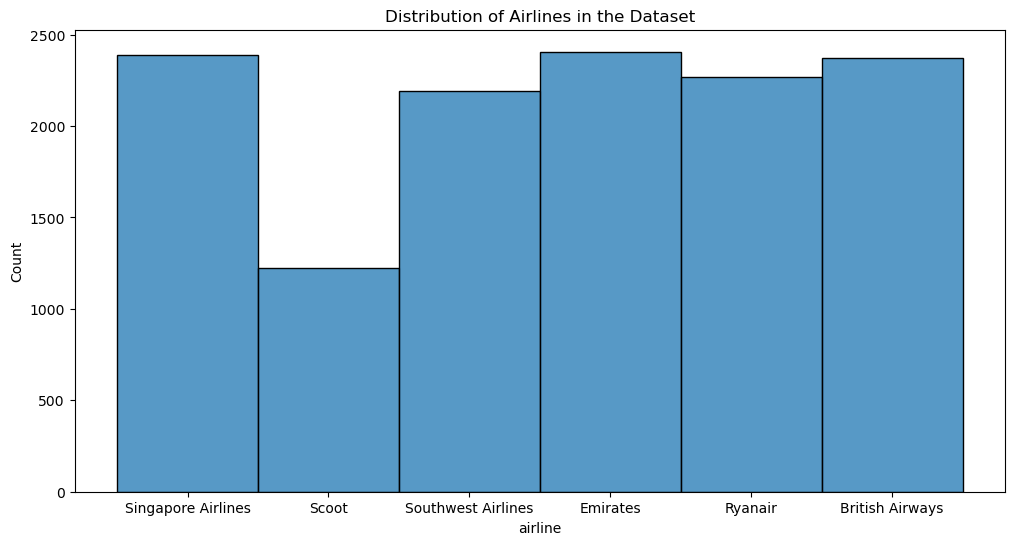

In [43]:
group=combined.groupby(['airline']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(combined['airline'])
plt.title('Distribution of Airlines in the Dataset')
plt.show()

In [44]:
combined.head()

,content,rating,airline
0,✅ Trip Verified | My first time on SQ since ...,5.0,Singapore Airlines
1,✅ Trip Verified | I want to acknowledge the ...,4.0,Singapore Airlines
2,✅ Trip Verified | Outstanding service from the...,4.0,Singapore Airlines
3,✅ Trip Verified | I took a SIA flight from S...,3.0,Singapore Airlines
4,✅ Trip Verified | Perfect service from the c...,3.0,Singapore Airlines


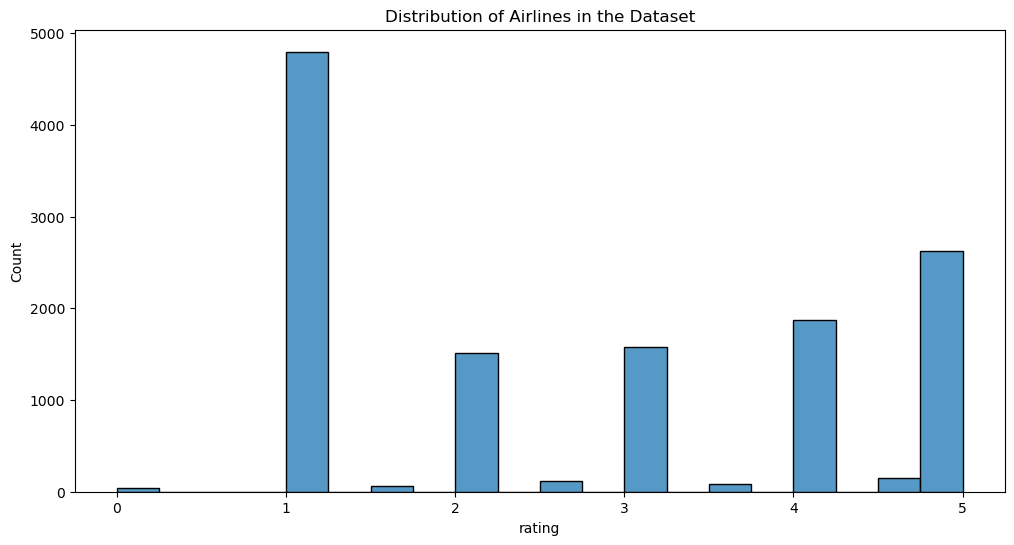

In [45]:
group=combined.groupby(['rating']).count()
plt.figure(figsize=(12, 6))  
sns.histplot(combined['rating'])
plt.title('Distribution of Airlines in the Dataset')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(combined,test_size=0.05, random_state=40)
train=train.reset_index()
train=train[['content','rating', 'airline']]
test=test.reset_index()
test=test[['content','rating', 'airline']]

In [47]:
train.head()

,content,rating,airline
0,Southwest's Boarding Process has gotten comple...,3.0,Southwest Airlines
1,Flew Sydney to Auckland in January 2017 with t...,5.0,Emirates
2,NEVER fly with scoot. I booked a ticket almost...,1.0,Scoot
3,✅ Trip Verified | Melbourne to London return ...,3.0,Singapore Airlines
4,MAD-DXB-SYD economy. A380 great seats B777 imp...,3.0,Emirates


In [48]:
test.head()

,content,rating,airline
0,Not Verified | We travelled on Singapore Airl...,3.0,Singapore Airlines
1,Service was good out of PBI plane looked a lit...,4.0,Southwest Airlines
2,Appalling. Delayed then left us stranded witho...,1.0,Scoot
3,EK 772 CPT to DXB. Flight was on a Boeing 777-...,5.0,Emirates
4,I booked a fairly priced return ticket between...,2.0,Ryanair


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12209 entries, 0 to 12208
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  12209 non-null  object 
 1   rating   12207 non-null  float64
 2   airline  12209 non-null  object 
dtypes: float64(1), object(2)
memory usage: 286.3+ KB


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  643 non-null    object 
 1   rating   643 non-null    float64
 2   airline  643 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.2+ KB


In [51]:
train.to_csv('train_set.csv')

In [52]:
test.to_csv('test_set.csv')